# Regression 02 : AirQuality

#### 머신러닝 코드 구조 <br>

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")



# [1] 다중회귀 모델링

## 00 환경준비

### 01.Import

In [1]:
#라이브러리들을 불러오자.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### 02.Data Loading

In [2]:
data_path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple.csv'
data = pd.read_csv(data_path)

데이터 설명 : https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/airquality.html

## 10.데이터 이해

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

### 11.둘러보기

In [3]:
# 상/하위 몇개 행을 살펴 봅시다.
print(data.head())
print(data.tail())

   Ozone  Solar.R  Wind  Temp  Month  Day
0     41    190.0   7.4    67      5    1
1     36    118.0   8.0    72      5    2
2     12    149.0  12.6    74      5    3
3     18    313.0  11.5    62      5    4
4     19      NaN  14.3    56      5    5
     Ozone  Solar.R  Wind  Temp  Month  Day
148     30    193.0   6.9    70      9   26
149     23    145.0  13.2    77      9   27
150     14    191.0  14.3    75      9   28
151     18    131.0   8.0    76      9   29
152     20    223.0  11.5    68      9   30


In [4]:
# 각 칼럼의 타입을 살펴 봅시다.

data.dtypes

Ozone        int64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
dtype: object

In [5]:
# 행, 열의 개수를 살펴 봅시다.

data.shape

(153, 6)

### 12.기초통계량

In [6]:
# 숫자형 변수들의 통계량을 살펴 봅니다.
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [7]:
# 범주형 변수의 통계량을 살펴 봅니다.
data['Month'].value_counts()

8    31
7    31
5    31
9    30
6    30
Name: Month, dtype: int64

In [8]:
# 각 변수별 NaN 현황 파악하기
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [9]:
# 각 변수별 NaN 현황 파악하기
data.isnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
148,False,False,False,False,False,False
149,False,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False


### 13.탐색하기

[matplotlib 기본을 잘 설명한 곳](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)

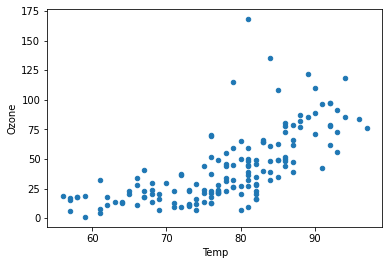

In [10]:
# 특정 기간을 정해서 차트를 그려봅시다.
data.plot.scatter(x='Temp', y='Ozone')
plt.show()

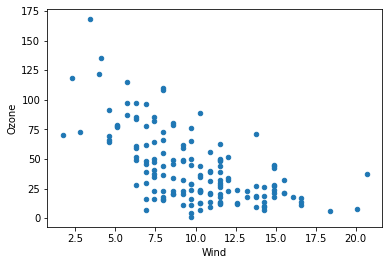

In [11]:
data.plot.scatter(x='Wind', y='Ozone')
plt.show()

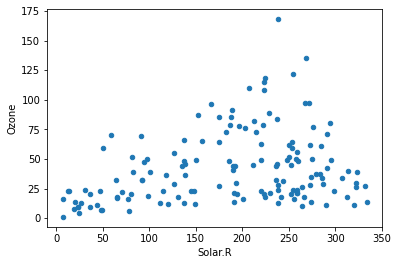

In [12]:
data.plot.scatter(x='Solar.R', y='Ozone')
plt.show()

In [ ]:
2# 위 차트에서 무엇이 보이나요?



## 20.데이터 준비

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

### 21.변수 정리

### 22.NA 처리

* ffill로 채워봅시다.

In [13]:
# 다시 NA가 몇건 있는지 살펴봅시다.
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [14]:
data.head(8)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5
5,28,NaN,14.9,66,5,6
6,23,299.0,8.6,65,5,7
7,19,99.0,13.8,59,5,8


In [15]:
# 시계열 데이터일 경우 쉬운 결정 : 이전 데이터로 채우기
data = data.fillna(method = 'ffill')#bfill은 뒤에 날짜 데이터로 채우는 것이다!
# data.fillna(method = 'ffill', inplace = True)
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [16]:
data.head(8)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,313.0,14.3,56,5,5
5,28,313.0,14.9,66,5,6
6,23,299.0,8.6,65,5,7
7,19,99.0,13.8,59,5,8


In [17]:
data

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,313.0,14.3,56,5,5
...,...,...,...,...,...,...
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29


### 23.Feature Engineering

### 24.Dummy Variable


익혀야 할 방법들
pd.get_dummies, pd.concat, (Pandas Dataframe).drop

### 25.Data Split

sklearn의 데이터 분할 함수를 사용해 봅시다.

* 요인, x, feature, 조작변수, 통제변수, 리스크백터, Input, (독립변수)
* 결과, y, target, label, Output, (종속변수)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# features와 target 분리
X = data.drop('Ozone', axis=1)
y = data.iloc[:, 0]

In [20]:
# 전체에서 train : test = 7 : 3
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

### 26.Scaling features




### 27.Dataframe to Numpy array

Scikit-learn 만 사용한다면 불필요할 수 있지만,   
* 많은 Python User들이 일반적으로 모델링하기 전에 넘파이 어레이로 변환하여 사용하고,
* 차후 딥러닝으로 넘어가면 Numpy를 사용해야 하기에,(Pandas데이터 타입을 사용하지 못한다.)  
우리도 넘파이 어레이로 변환해서 모델링하자!  

사실 링크된 Scikit-learn의 문서들을 보면 거의 Numpy하고만 같이 사용되고 있다!<br>
[values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html)

In [35]:
train_x, train_y = train_x.values, train_y.values
test_x, test_y = test_x.values, test_y.values

print(train_x.shape, train_y.shape)

(107, 5) (107,)


## 30.모델링

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

Model Training : Multivariate Linear Regression

이제 데이터가 준비 되었습니다.  
2개 이상의 입력변수를 이용한 Multivariate Linear Regression을 사용해 봅시다.

**빈 칸을 채우며 모델링을 수행해 봅시다.**

### 31.import

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### 32.모델선언

In [25]:
# 모델 선언
multi_regression =  LinearRegression()

### 33.모델링(학습)

In [27]:
multi_regression.fit(train_x, train_y)

LinearRegression()

In [28]:
# 회귀계수 살펴보기. 모델을 열어 보자
print(X.columns.tolist())
print(multi_regression.coef_    )        # 회귀계수
print(multi_regression.intercept_    )        # y절편

['Solar.R', 'Wind', 'Temp', 'Month', 'Day']
[ 0.05576154 -3.29258663  1.75401479 -1.83529503  0.3152641 ]
-65.59789060544094


### 34.예측

In [31]:
# 예측값을 뽑자.
test_pred = multi_regression.predict(test_x)

### 35.평가

* 기술적 관점 평가

In [34]:
#test set에서의 성능 확인
# MSE, 
print(mean_squared_error(test_y, test_pred))

# RMSE
print(mean_squared_error(test_y, test_pred, squared=0))

# MAE
print(mean_absolute_error(test_y  , test_pred))

313.5153670910093
17.706365157507886
13.157119395031156
